<a href="https://colab.research.google.com/github/cheyoung211/2023-Spring-Maths-for-ML/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [ ]:
Url = "https://raw.githubusercontent.com/cheyoung211/2023-Spring-Maths-for-ML/main/diabetes_prediction_dataset.csv"
df = pd.read_csv(Url)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.drop_duplicates(inplace = True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


##EDA

In [ ]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
df['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()  # 문자를 숫자로 mapping
df['gender'] = label_encoder.fit_transform(df['gender'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
df['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [ ]:
smoking_history_mapping = {"No Info" : -1, "never" : 0, "current" : 1, "former" : 1, "ever" : 2, "not current": 0}
df['smoking_history'] = df['smoking_history'].map(smoking_history_mapping)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,-1,24.60,4.8,145,0
99996,0,2.0,0,0,-1,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [ ]:
df['age'] = df['age'].astype(int)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,0,25.19,6.6,140,0
1,0,54,0,0,-1,27.32,6.6,80,0
2,1,28,0,0,0,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0


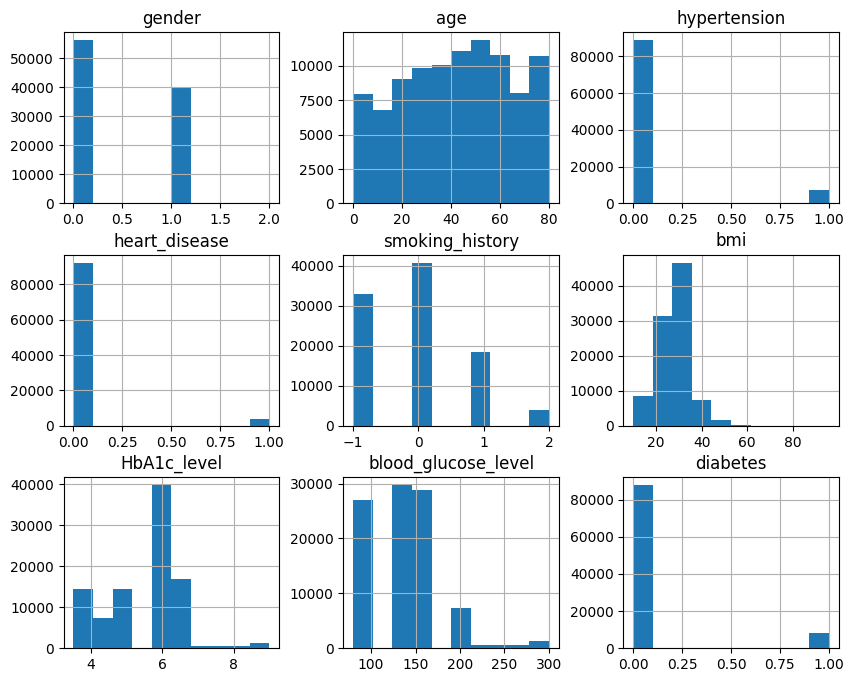

In [ ]:
df.hist(bins = 10, figsize = (10,8))
plt.show()

##Splitting Datasets

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42,stratify = df.iloc[:,-1
])

##Training the model using ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random

In [ ]:
random.seed(5)

model = Sequential()
model.add(Dense(7,activation = 'relu'))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['binary_accuracy'])

history = model.fit(x_train, y_train,validation_split = 0.25, epochs = 30, batch_size = 32)

Epoch 1/30
1691/1691 [==============================] - 4s 2ms/step - loss: 0.3273 - binary_accuracy: 0.9048 - val_loss: 0.1899 - val_binary_accuracy: 0.9395
Epoch 2/30
1691/1691 [==============================] - 3s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9393 - val_loss: 0.1763 - val_binary_accuracy: 0.9355
Epoch 3/30
1691/1691 [==============================] - 3s 2ms/step - loss: 0.1564 - binary_accuracy: 0.9441 - val_loss: 0.1358 - val_binary_accuracy: 0.9511
Epoch 4/30
1691/1691 [==============================] - 3s 2ms/step - loss: 0.1365 - binary_accuracy: 0.9499 - val_loss: 0.1195 - val_binary_accuracy: 0.9587
Epoch 5/30
1691/1691 [==============================] - 3s 2ms/step - loss: 0.1258 - binary_accuracy: 0.9545 - val_loss: 0.1468 - val_binary_accuracy: 0.9475
Epoch 6/30
1691/1691 [==============================] - 3s 2ms/step - loss: 0.1239 - binary_accuracy: 0.9554 - val_loss: 0.1327 - val_binary_accuracy: 0.9511
Epoch 7/30
1691/1691 [==============================

##Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(x_train, y_train, epochs=30, validation_split = 0.25,callbacks=[early_stop])

Epoch 1/30
1691/1691 [==============================] - 5s 3ms/step - loss: 0.1101 - binary_accuracy: 0.9612 - val_loss: 0.1127 - val_binary_accuracy: 0.9584
Epoch 2/30
1691/1691 [==============================] - 3s 2ms/step - loss: 0.1112 - binary_accuracy: 0.9609 - val_loss: 0.1107 - val_binary_accuracy: 0.9595
Epoch 3/30
1691/1691 [==============================] - 2s 1ms/step - loss: 0.1119 - binary_accuracy: 0.9610 - val_loss: 0.1077 - val_binary_accuracy: 0.9625
Epoch 4/30
1691/1691 [==============================] - 3s 2ms/step - loss: 0.1104 - binary_accuracy: 0.9616 - val_loss: 0.1061 - val_binary_accuracy: 0.9627
Epoch 5/30
1691/1691 [==============================] - 3s 2ms/step - loss: 0.1104 - binary_accuracy: 0.9614 - val_loss: 0.1051 - val_binary_accuracy: 0.9637
Epoch 6/30
1691/1691 [==============================] - 2s 1ms/step - loss: 0.1111 - binary_accuracy: 0.9617 - val_loss: 0.1035 - val_binary_accuracy: 0.9628
Epoch 7/30
1691/1691 [==============================

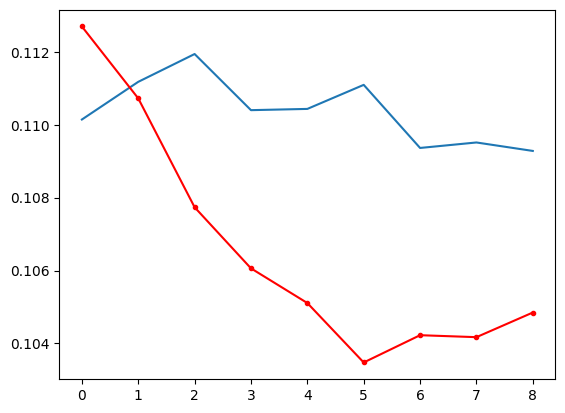

In [ ]:
y_loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(y_loss))
val_len = np.arange(len(val_loss))

plt.plot(x_len,y_loss)
plt.plot(val_len, val_loss, marker = '.', c = 'red')

plt.show()

##k-fold validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

seed = 5
np.random.seed(seed)

def create_model():
  model = Sequential()
  model.add(Dense(7, activation = 'relu'))
  model.add(Dense(7, activation = 'relu'))
  model.add(Dense(7, activation = 'relu'))
  model.add(Dense(7, activation = 'relu'))
  model.add(Dense(7, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))

  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
  return model

model = KerasClassifier(build_fn=create_model, epochs = 30, batch_size = 30, verbose = 1)

kfold = KFold(n_splits = 5, shuffle = True, random_state = 5)

results = cross_val_score(model, x_train, y_train, cv = kfold)
print('결과', results)

Epoch 1/30


<ipython-input-25-419ded39aef4>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs = 30, batch_size = 30, verbose = 1)


1923/1923 [==============================] - 4s 1ms/step - loss: 0.3062 - accuracy: 0.8969
Epoch 2/30
1923/1923 [==============================] - 3s 1ms/step - loss: 0.2088 - accuracy: 0.9341
Epoch 3/30
1923/1923 [==============================] - 2s 1ms/step - loss: 0.1556 - accuracy: 0.9453
Epoch 4/30
1923/1923 [==============================] - 2s 1ms/step - loss: 0.1362 - accuracy: 0.9505
Epoch 5/30
1923/1923 [==============================] - 2s 1ms/step - loss: 0.1290 - accuracy: 0.9528
Epoch 6/30
1923/1923 [==============================] - 2s 1ms/step - loss: 0.1269 - accuracy: 0.9540
Epoch 7/30
1923/1923 [==============================] - 3s 2ms/step - loss: 0.1262 - accuracy: 0.9540
Epoch 8/30
1923/1923 [==============================] - 2s 1ms/step - loss: 0.1240 - accuracy: 0.9548
Epoch 9/30
1923/1923 [==============================] - 2s 1ms/step - loss: 0.1233 - accuracy: 0.9554
Epoch 10/30
1923/1923 [==============================] - 2s 1ms/step - loss: 0.1228 - accurac

###Initialization
###Batch normalization
###regularization

In [ ]:
from functools import partial
layer = Dense(100, activation = 'elu', kernel_initializer = 'he_normal',kernel_regularizer = tf.keras.regularizers.l2(0.01))

RegularizedDense = partial(Dense, activation = 'elu', kernel_initializer = 'he_normal',kernel_regularizer = keras.regularizers.l2(0.01))

model2 = Sequential([RegularizedDense(30), 
                    RegularizedDense(20), 
                    RegularizedDense(20), 
                    RegularizedDense(1, activation = 'softmax', kernel_initializer = 'glorot_uniform')])

In [ ]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['binary_accuracy'])

model2.fit(x_train, y_train, validation_split = 0.25, epochs = 30, batch_size = 32)

Epoch 1/30
1691/1691 [==============================] - 3s 2ms/step - loss: 0.4459 - binary_accuracy: 0.0880 - val_loss: 0.3925 - val_binary_accuracy: 0.0888
Epoch 2/30
1691/1691 [==============================] - 3s 2ms/step - loss: 0.3876 - binary_accuracy: 0.0880 - val_loss: 0.3453 - val_binary_accuracy: 0.0888
Epoch 3/30
1691/1691 [==============================] - 3s 2ms/step - loss: 0.3417 - binary_accuracy: 0.0880 - val_loss: 0.3175 - val_binary_accuracy: 0.0888
Epoch 4/30
1691/1691 [==============================] - 3s 2ms/step - loss: 0.3152 - binary_accuracy: 0.0880 - val_loss: 0.2906 - val_binary_accuracy: 0.0888
Epoch 5/30
1691/1691 [==============================] - 2s 1ms/step - loss: 0.2895 - binary_accuracy: 0.0880 - val_loss: 0.2625 - val_binary_accuracy: 0.0888
Epoch 6/30
1691/1691 [==============================] - 3s 2ms/step - loss: 0.2691 - binary_accuracy: 0.0880 - val_loss: 0.2536 - val_binary_accuracy: 0.0888
Epoch 7/30
1691/1691 [==============================

##Dropout

In [ ]:
model3 = Sequential([keras.layers.Dense(8, activation = 'relu', kernel_initializer = 'he_normal'),
                   keras.layers.Dropout(rate = 0.2),
                   keras.layers.Dense(10,activation = 'relu', kernel_initializer = 'he_normal'),
                   keras.layers.Dropout(rate = 0.2),
                   keras.layers.Dense(10,activation = 'relu', kernel_initializer = 'he_normal'),
                   keras.layers.Dropout(rate = 0.2),
                   keras.layers.Dense(1,activation = 'sigmoid')])


model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['binary_accuracy'])

model3.fit(x_train, y_train, validation_split = 0.25, epochs = 30, batch_size = 32)

Epoch 1/30
1691/1691 [==============================] - 4s 2ms/step - loss: 1.6245 - binary_accuracy: 0.8422 - val_loss: 0.3445 - val_binary_accuracy: 0.9112
Epoch 2/30
1691/1691 [==============================] - 3s 2ms/step - loss: 0.3441 - binary_accuracy: 0.9061 - val_loss: 0.3069 - val_binary_accuracy: 0.9112
Epoch 3/30
1691/1691 [==============================] - 2s 1ms/step - loss: 0.3044 - binary_accuracy: 0.9117 - val_loss: 0.2994 - val_binary_accuracy: 0.9112
Epoch 4/30
1691/1691 [==============================] - 2s 1ms/step - loss: 0.2982 - binary_accuracy: 0.9118 - val_loss: 0.2995 - val_binary_accuracy: 0.9112
Epoch 5/30
1691/1691 [==============================] - 2s 1ms/step - loss: 0.2966 - binary_accuracy: 0.9118 - val_loss: 0.2998 - val_binary_accuracy: 0.9112
Epoch 6/30
1691/1691 [==============================] - 3s 2ms/step - loss: 0.2952 - binary_accuracy: 0.9120 - val_loss: 0.2987 - val_binary_accuracy: 0.9112
Epoch 7/30
1691/1691 [==============================

##Confusion matrix, ROC curve, AUC, PR curve

In [ ]:
random.seed(5)

model = Sequential()
model.add(Dense(3,activation = 'sigmoid'))
model.add(Dense(3,activation = 'sigmoid'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['binary_accuracy'])

history = model.fit(x_train, y_train, epochs = 2, batch_size = 100)

Epoch 1/2
722/722 [==============================] - 1s 1ms/step - loss: 0.3132 - binary_accuracy: 0.9118
Epoch 2/2
722/722 [==============================] - 1s 1ms/step - loss: 0.2931 - binary_accuracy: 0.9118


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv = 3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[62860,  2888],
       [ 1578,  4783]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)

0.6235171424846826

In [ ]:
recall_score(y_train, y_train_pred)

0.7519257978305298

In [ ]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train, cv = 3, method = 'decision_function')
y_scores

array([   3.30540814, -243.20710398, -308.83617328, ..., -472.45671493,
       -204.96643226, -273.05064939])

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

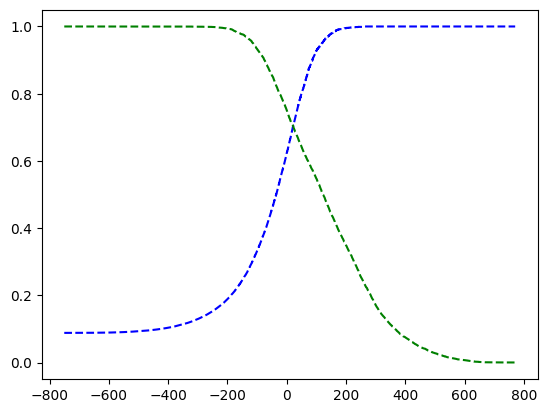

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label = '정밀도')
  plt.plot(thresholds, recalls[:-1], 'g--', label = '재현율')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

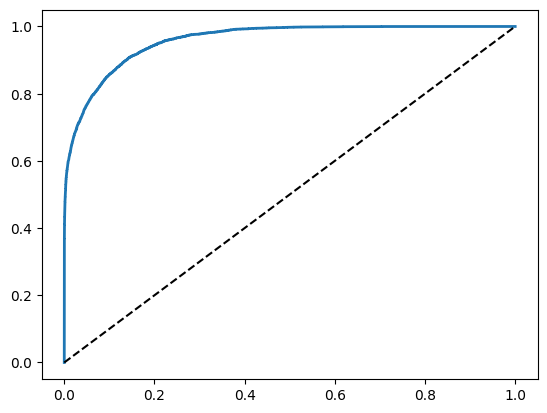

In [ ]:
def plot_roc_curve(fpr, tpr, label = None):
  plt.plot(fpr, tpr, linewidth = 2, label = label)
  plt.plot([0,1],[0,1],'k--')

plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.9592609699626583